In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
np.set_printoptions(precision=6, formatter={'all': lambda x: f'{x:f}'})

# **Polynomial**

$$ y = 1 + 2x^2 + 5x^4 $$
and get the value of $y$ using $x=6$ 
Manual Method

In [3]:
coef = [1,0,2,0,5]
degree = len(coef)-1

x = 6.0

def sum_all(x,coef):
  sum, pow = 0,0
  for i in coef:
    sum+=(i)*(x**pow)
    pow+=1
  return sum
p_x = sum_all(x,coef)
print(p_x)

6553.0


Just Polynomial import diye $P = Polynomial([a,b,c,d])$

In [4]:
coeff = np.array([1.0, 0.0, 2.0, 0.0, 5.0])
x_arr = np.array([1, 2, 3, 4, 5])
P = Polynomial(coeff)
y_arr = P(x_arr)
print(x_arr,y_arr)

[1.000000 2.000000 3.000000 4.000000 5.000000] [8.000000 89.000000 424.000000 1313.000000 3176.000000]


# **Vandermod**
Extract the $x$ and $y$ in matrix and get the values of the $a$ and make a polynomial using the values of $a$
$$a=YX^{-1}$$
where $\mathbf{X} = $

\begin{bmatrix}
x^0 & x^1 & x^2 & \cdots & x^n\\
x^0 & x^1 & x^2 & \cdots & x^n\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
x^0 & x^1 & x^2 & \cdots & x^n\\
\end{bmatrix}

Inverse matrix: ``X_inv = np.linalg.pinv(x)``

In [5]:
def vandermod_ploy(data_x, data_y):
  nodes = len(data_x)
  X = np.zeros((nodes,nodes))
  for row in range(nodes): # Making X matrix x^0, x^1, x^2 ..
    for col in range(nodes):
      X[row][col] = data_x[row]**col

  # Inverse X Matrix-------------------------------
  X_inv = np.linalg.inv(X)
  # -----------------------------------------------
  a = np.dot(X_inv,data_y) # y_data*X_inv doesn't work

  P = Polynomial(a)
  
  return P

# **Graph**
Steps:
  1. data_x and data_y for the dots
  2. Continuous x_arr from lowest to highest for the line ``np.linspace(low,high,count)``
  3. Put the x_arr value in to the polynomial created to get y_arr
  4. x_arr, y_arr for the line

1.0 - 5.075 x + 5.520833 x**2 + 4.854167 x**3 - 1.020833 x**4 -
0.279167 x**5


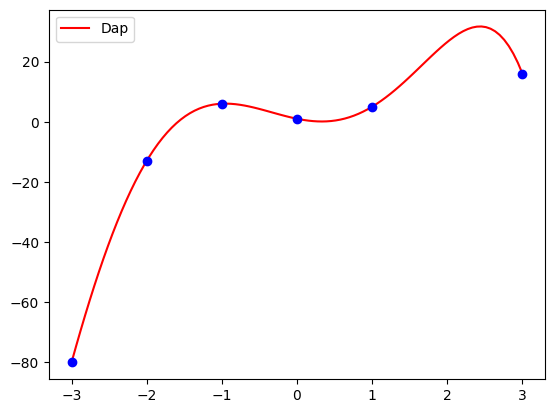

In [6]:
data_x = np.array([-3., -2., -1., 0., 1., 3.])
data_y = np.array([-80., -13., 6., 1., 5., 16.])
p = vandermod_ploy(data_x, data_y)
print(p)

x_arr = np.linspace(-3,3,100)
y_arr = p(x_arr)

plt.plot(x_arr,y_arr,'r', label="Dap")
plt.plot(data_x, data_y,'bo') # b = Blue; o = golla; * dile star hobe
plt.legend()
plt.show()